In [1]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [205]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.io import arff
import xgboost as xgb
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv("students-all.csv")

In [219]:
df = pd.get_dummies(df, drop_first=True)
df.head()
df = df.iloc[:,1:]
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,major_por
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0


In [208]:
def train_fast(df, max_depth ):
    
    df = df.sample(frac=1).reset_index(drop=True)
    train = df.iloc[1:round(0.7*len(df)),:]
    validation = df.iloc[round(0.7*len(df)):round(0.85*len(df)),:]
    test = df.iloc[round(0.85*len(df)):,:]
    label_train = train.romantic_yes
    label_val = validation.romantic_yes
    label_test = test.romantic_yes

    df_train = train.drop(["romantic_yes"], axis = 1)
    df_test  = test.drop(["romantic_yes"], axis = 1)
    df_val  = validation.drop(["romantic_yes"], axis = 1)
    dtrain = xgb.DMatrix(data = df_train, label=label_train)
    dval = xgb.DMatrix(data = df_val, label=label_val)
    dtest = xgb.DMatrix(data = df_test, label=label_val)
    param = {'max_depth': max_depth, 'objective': 'binary:logistic', 'eval_metric':'auc'}
    evallist = [(dval, 'eval'), (dtrain, 'train')]
    num_round = 100
    bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=50)
    ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    ret = sum(np.round(ypred) == label_test)/label_test.size
    
    return ret, bst

In [116]:
acc_results = []
acc_sum = 0
for i in range(100): 
    for i in range(10):
        acc , bst = train_fast(df, i)
        acc_sum += acc
    acc_results.append(acc_sum/10)
    acc_sum = 0

[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5


/home/jakwisn/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/jakwisn/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	eval-auc:0.625	train-auc:0.580662
[50]	eval-auc:0.627802	train-auc:0.74084
[99]	eval-auc:0.622792	train-auc:0.771771
[0]	eval-auc:0.590099	train-auc:0.637718
[50]	eval-auc:0.649325	train-auc:0.87114
[99]	eval-auc:0.646085	train-auc:0.921984
[0]	eval-auc:0.592946	train-auc:0.66757
[50]	eval-auc:0.728393	train-auc:0.965818
[99]	eval-auc:0.763214	train-auc:0.995098
[0]	eval-auc:0.570076	train-auc:0.693711
[50]	eval-auc:0.697833	train-auc:0.993488
[99]	eval-auc:0.736483	train-auc:0.999944
[0]	eval-auc:0.574707	train-auc:0.748579
[50]	eval-auc:0.754095	train-auc:0.999967
[99]	eval-auc:0.753555	train-auc:1
[0]	eval-auc:0.599605	train-auc:0.790495
[50]	eval-auc:0.715683	train-auc:1
[99]	eval-auc:0.725635	train-auc:1
[0]	eval-auc:0.634641	train-auc:0.797877
[50]	eval-auc:0.801494	train-auc:1
[99]	eval-auc:0.804669	train-auc:1
[0]	eval-auc:0.652344	train-auc:0.855665
[50]	eval-auc:0.865972	train-auc:1
[99]	eval-auc:0.857986	train-auc:1
[0]	eval-auc:0.646518	train-auc:0.889964
[50]	eval-auc:

[99]	eval-auc:0.668068	train-auc:0.924091
[0]	eval-auc:0.612703	train-auc:0.653139
[50]	eval-auc:0.706273	train-auc:0.964959
[99]	eval-auc:0.70802	train-auc:0.994174
[0]	eval-auc:0.587278	train-auc:0.66183
[50]	eval-auc:0.765902	train-auc:0.994405
[99]	eval-auc:0.766642	train-auc:1
[0]	eval-auc:0.621302	train-auc:0.733723
[50]	eval-auc:0.752404	train-auc:0.999983
[99]	eval-auc:0.773299	train-auc:1
[0]	eval-auc:0.541474	train-auc:0.806501
[50]	eval-auc:0.799383	train-auc:1
[99]	eval-auc:0.821759	train-auc:1
[0]	eval-auc:0.622063	train-auc:0.832206
[50]	eval-auc:0.825359	train-auc:1
[99]	eval-auc:0.842434	train-auc:1
[0]	eval-auc:0.637667	train-auc:0.838903
[50]	eval-auc:0.840605	train-auc:1
[99]	eval-auc:0.856967	train-auc:1
[0]	eval-auc:0.70351	train-auc:0.840584
[50]	eval-auc:0.753735	train-auc:1
[99]	eval-auc:0.768497	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.525714	train-auc:0.590957
[50]	eval-auc:0.5925

[50]	eval-auc:0.796296	train-auc:0.99441
[99]	eval-auc:0.831019	train-auc:0.999935
[0]	eval-auc:0.626387	train-auc:0.718862
[50]	eval-auc:0.680662	train-auc:0.99995
[99]	eval-auc:0.693122	train-auc:1
[0]	eval-auc:0.529417	train-auc:0.757048
[50]	eval-auc:0.815524	train-auc:1
[99]	eval-auc:0.824207	train-auc:1
[0]	eval-auc:0.577778	train-auc:0.83916
[50]	eval-auc:0.8338	train-auc:1
[99]	eval-auc:0.822222	train-auc:1
[0]	eval-auc:0.633129	train-auc:0.872103
[50]	eval-auc:0.738351	train-auc:1
[99]	eval-auc:0.756272	train-auc:1
[0]	eval-auc:0.537369	train-auc:0.867223
[50]	eval-auc:0.717348	train-auc:1
[99]	eval-auc:0.73475	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.638868	train-auc:0.57456
[50]	eval-auc:0.713868	train-auc:0.718786
[99]	eval-auc:0.718113	train-auc:0.744001
[0]	eval-auc:0.559357	train-auc:0.613742
[50]	eval-auc:0.657914	train-auc:0.867453
[99]	eval-auc:0.679734	train-auc:0.912302
[0]	eval-auc:0.4

[0]	eval-auc:0.670742	train-auc:0.800067
[50]	eval-auc:0.852217	train-auc:1
[99]	eval-auc:0.839198	train-auc:1
[0]	eval-auc:0.57697	train-auc:0.822191
[50]	eval-auc:0.757917	train-auc:1
[99]	eval-auc:0.766186	train-auc:1
[0]	eval-auc:0.571197	train-auc:0.899871
[50]	eval-auc:0.794419	train-auc:1
[99]	eval-auc:0.787939	train-auc:1
[0]	eval-auc:0.66232	train-auc:0.880596
[50]	eval-auc:0.88418	train-auc:1
[99]	eval-auc:0.889499	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.547619	train-auc:0.572365
[50]	eval-auc:0.567507	train-auc:0.746127
[99]	eval-auc:0.555556	train-auc:0.769465
[0]	eval-auc:0.5128	train-auc:0.621884
[50]	eval-auc:0.601126	train-auc:0.866767
[99]	eval-auc:0.633987	train-auc:0.925165
[0]	eval-auc:0.60084	train-auc:0.68147
[50]	eval-auc:0.70084	train-auc:0.966277
[99]	eval-auc:0.752194	train-auc:0.993947
[0]	eval-auc:0.591631	train-auc:0.711371
[50]	eval-auc:0.73132	train-auc:0.996526
[99]	eval-au

[0]	eval-auc:0.577048	train-auc:0.862414
[50]	eval-auc:0.787039	train-auc:1
[99]	eval-auc:0.789919	train-auc:1
[0]	eval-auc:0.570023	train-auc:0.898249
[50]	eval-auc:0.740548	train-auc:1
[99]	eval-auc:0.752508	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.634061	train-auc:0.576678
[50]	eval-auc:0.72836	train-auc:0.729128
[99]	eval-auc:0.712878	train-auc:0.75993
[0]	eval-auc:0.591339	train-auc:0.604265
[50]	eval-auc:0.685357	train-auc:0.882634
[99]	eval-auc:0.689286	train-auc:0.931298
[0]	eval-auc:0.600751	train-auc:0.650752
[50]	eval-auc:0.694266	train-auc:0.964903
[99]	eval-auc:0.710936	train-auc:0.994979
[0]	eval-auc:0.59937	train-auc:0.703948
[50]	eval-auc:0.743654	train-auc:0.995001
[99]	eval-auc:0.775878	train-auc:1
[0]	eval-auc:0.569368	train-auc:0.771775
[50]	eval-auc:0.840711	train-auc:0.999951
[99]	eval-auc:0.876285	train-auc:1
[0]	eval-auc:0.664895	train-auc:0.792772
[50]	eval-auc:0.784335	train-auc:1

[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.528571	train-auc:0.526048
[50]	eval-auc:0.763929	train-auc:0.726802
[99]	eval-auc:0.772679	train-auc:0.753231
[0]	eval-auc:0.62212	train-auc:0.611915
[50]	eval-auc:0.694316	train-auc:0.874121
[99]	eval-auc:0.699778	train-auc:0.922185
[0]	eval-auc:0.574683	train-auc:0.658258
[50]	eval-auc:0.706897	train-auc:0.96307
[99]	eval-auc:0.748241	train-auc:0.992606
[0]	eval-auc:0.60396	train-auc:0.694573
[50]	eval-auc:0.729793	train-auc:0.996969
[99]	eval-auc:0.741314	train-auc:1
[0]	eval-auc:0.558036	train-auc:0.751695
[50]	eval-auc:0.730357	train-auc:1
[99]	eval-auc:0.769286	train-auc:1
[0]	eval-auc:0.603735	train-auc:0.76414
[50]	eval-auc:0.810836	train-auc:1
[99]	eval-auc:0.816753	train-auc:1
[0]	eval-auc:0.688304	train-auc:0.769845
[50]	eval-auc:0.768393	train-auc:1
[99]	eval-auc:0.764821	train-auc:1
[0]	eval-auc:0.565711	train-auc:0.78462
[50]	eval-auc:0.835375	train-auc:1
[99]	eva

[99]	eval-auc:0.644132	train-auc:0.756789
[0]	eval-auc:0.470225	train-auc:0.600489
[50]	eval-auc:0.730029	train-auc:0.868469
[99]	eval-auc:0.737291	train-auc:0.92207
[0]	eval-auc:0.540541	train-auc:0.643969
[50]	eval-auc:0.616617	train-auc:0.975676
[99]	eval-auc:0.642242	train-auc:0.994926
[0]	eval-auc:0.549276	train-auc:0.698811
[50]	eval-auc:0.671552	train-auc:0.992157
[99]	eval-auc:0.69848	train-auc:1
[0]	eval-auc:0.636275	train-auc:0.731592
[50]	eval-auc:0.758993	train-auc:0.999976
[99]	eval-auc:0.762538	train-auc:1
[0]	eval-auc:0.653968	train-auc:0.775647
[50]	eval-auc:0.806349	train-auc:1
[99]	eval-auc:0.81606	train-auc:1
[0]	eval-auc:0.633598	train-auc:0.856511
[50]	eval-auc:0.772559	train-auc:1
[99]	eval-auc:0.789386	train-auc:1
[0]	eval-auc:0.647435	train-auc:0.852099
[50]	eval-auc:0.774978	train-auc:1
[99]	eval-auc:0.781458	train-auc:1
[0]	eval-auc:0.737375	train-auc:0.903086
[50]	eval-auc:0.79661	train-auc:1
[99]	eval-auc:0.785602	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[

[50]	eval-auc:0.704717	train-auc:0.972019
[99]	eval-auc:0.710566	train-auc:0.995349
[0]	eval-auc:0.563147	train-auc:0.72677
[50]	eval-auc:0.693344	train-auc:0.994157
[99]	eval-auc:0.709545	train-auc:0.999968
[0]	eval-auc:0.553251	train-auc:0.724576
[50]	eval-auc:0.814473	train-auc:0.999875
[99]	eval-auc:0.832565	train-auc:1
[0]	eval-auc:0.586687	train-auc:0.797751
[50]	eval-auc:0.701125	train-auc:1
[99]	eval-auc:0.708182	train-auc:1
[0]	eval-auc:0.622313	train-auc:0.82848
[50]	eval-auc:0.801153	train-auc:1
[99]	eval-auc:0.811463	train-auc:1
[0]	eval-auc:0.594564	train-auc:0.836643
[50]	eval-auc:0.766695	train-auc:1
[99]	eval-auc:0.752718	train-auc:1
[0]	eval-auc:0.539409	train-auc:0.855241
[50]	eval-auc:0.811752	train-auc:1
[99]	eval-auc:0.818965	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.595357	train-auc:0.579083
[50]	eval-auc:0.695446	train-auc:0.731426
[99]	eval-auc:0.694643	train-auc:0.751541
[0]	eval-au

[0]	eval-auc:0.611656	train-auc:0.723719
[50]	eval-auc:0.757444	train-auc:0.999896
[99]	eval-auc:0.791394	train-auc:1
[0]	eval-auc:0.612529	train-auc:0.747298
[50]	eval-auc:0.841751	train-auc:1
[99]	eval-auc:0.847422	train-auc:1
[0]	eval-auc:0.643214	train-auc:0.836272
[50]	eval-auc:0.762759	train-auc:1
[99]	eval-auc:0.765348	train-auc:1
[0]	eval-auc:0.723746	train-auc:0.876154
[50]	eval-auc:0.836275	train-auc:1
[99]	eval-auc:0.844837	train-auc:1
[0]	eval-auc:0.646218	train-auc:0.896278
[50]	eval-auc:0.743978	train-auc:1
[99]	eval-auc:0.761531	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.558859	train-auc:0.60355
[50]	eval-auc:0.595596	train-auc:0.73545
[99]	eval-auc:0.615215	train-auc:0.755676
[0]	eval-auc:0.505357	train-auc:0.620002
[50]	eval-auc:0.663214	train-auc:0.87753
[99]	eval-auc:0.661786	train-auc:0.932951
[0]	eval-auc:0.515529	train-auc:0.659248
[50]	eval-auc:0.63966	train-auc:0.97006
[99]	eval-auc:0

[99]	eval-auc:0.748822	train-auc:1
[0]	eval-auc:0.628397	train-auc:0.801131
[50]	eval-auc:0.828125	train-auc:1
[99]	eval-auc:0.828804	train-auc:1
[0]	eval-auc:0.715907	train-auc:0.847339
[50]	eval-auc:0.789815	train-auc:1
[99]	eval-auc:0.792295	train-auc:1
[0]	eval-auc:0.747165	train-auc:0.888829
[50]	eval-auc:0.817282	train-auc:1
[99]	eval-auc:0.819802	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.560185	train-auc:0.575787
[50]	eval-auc:0.571856	train-auc:0.741412
[99]	eval-auc:0.607446	train-auc:0.763351
[0]	eval-auc:0.567679	train-auc:0.630397
[50]	eval-auc:0.653929	train-auc:0.868963
[99]	eval-auc:0.667321	train-auc:0.912259
[0]	eval-auc:0.618839	train-auc:0.667603
[50]	eval-auc:0.708393	train-auc:0.968653
[99]	eval-auc:0.733036	train-auc:0.994514
[0]	eval-auc:0.68616	train-auc:0.675844
[50]	eval-auc:0.818713	train-auc:0.996007
[99]	eval-auc:0.829878	train-auc:0.999859
[0]	eval-auc:0.61937	train-auc:0.77249

[50]	eval-auc:0.733829	train-auc:1
[99]	eval-auc:0.747475	train-auc:1
[0]	eval-auc:0.680112	train-auc:0.886791
[50]	eval-auc:0.868721	train-auc:1
[99]	eval-auc:0.860317	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.513637	train-auc:0.541565
[50]	eval-auc:0.70494	train-auc:0.721127
[99]	eval-auc:0.695213	train-auc:0.743313
[0]	eval-auc:0.555779	train-auc:0.63141
[50]	eval-auc:0.670452	train-auc:0.866204
[99]	eval-auc:0.713684	train-auc:0.921968
[0]	eval-auc:0.607113	train-auc:0.68143
[50]	eval-auc:0.676495	train-auc:0.96402
[99]	eval-auc:0.701982	train-auc:0.99255
[0]	eval-auc:0.578587	train-auc:0.702088
[50]	eval-auc:0.726886	train-auc:0.995163
[99]	eval-auc:0.741309	train-auc:1
[0]	eval-auc:0.578719	train-auc:0.754884
[50]	eval-auc:0.797045	train-auc:0.999992
[99]	eval-auc:0.81301	train-auc:1
[0]	eval-auc:0.564906	train-auc:0.710343
[50]	eval-auc:0.755094	train-auc:1
[99]	eval-auc:0.781132	train-auc:1
[0]	eval

[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.496786	train-auc:0.540876
[50]	eval-auc:0.649107	train-auc:0.730198
[99]	eval-auc:0.636964	train-auc:0.748754
[0]	eval-auc:0.579853	train-auc:0.611954
[50]	eval-auc:0.699109	train-auc:0.878667
[99]	eval-auc:0.698235	train-auc:0.922081
[0]	eval-auc:0.669655	train-auc:0.655815
[50]	eval-auc:0.78282	train-auc:0.971201
[99]	eval-auc:0.787488	train-auc:0.992979
[0]	eval-auc:0.613231	train-auc:0.688711
[50]	eval-auc:0.754095	train-auc:0.997521
[99]	eval-auc:0.771017	train-auc:1
[0]	eval-auc:0.614581	train-auc:0.767531
[50]	eval-auc:0.771387	train-auc:0.999976
[99]	eval-auc:0.773585	train-auc:1
[0]	eval-auc:0.624159	train-auc:0.753069
[50]	eval-auc:0.817774	train-auc:1
[99]	eval-auc:0.819327	train-auc:1
[0]	eval-auc:0.626823	train-auc:0.855234
[50]	eval-auc:0.752778	train-auc:1
[99]	eval-auc:0.7625	train-auc:1
[0]	eval-auc:0.642796	train-auc:0.856687
[50]	eval-auc:0.80069	train-auc:1


[0]	eval-auc:0.649486	train-auc:0.596698
[50]	eval-auc:0.718394	train-auc:0.864108
[99]	eval-auc:0.746592	train-auc:0.920589
[0]	eval-auc:0.59859	train-auc:0.651955
[50]	eval-auc:0.721637	train-auc:0.966329
[99]	eval-auc:0.761209	train-auc:0.994508
[0]	eval-auc:0.613471	train-auc:0.69112
[50]	eval-auc:0.745098	train-auc:0.99023
[99]	eval-auc:0.761983	train-auc:0.999976
[0]	eval-auc:0.59594	train-auc:0.770517
[50]	eval-auc:0.791919	train-auc:0.999952
[99]	eval-auc:0.812219	train-auc:1
[0]	eval-auc:0.645845	train-auc:0.781991
[50]	eval-auc:0.79888	train-auc:1
[99]	eval-auc:0.817554	train-auc:1
[0]	eval-auc:0.608774	train-auc:0.801979
[50]	eval-auc:0.80566	train-auc:1
[99]	eval-auc:0.81566	train-auc:1
[0]	eval-auc:0.626271	train-auc:0.866328
[50]	eval-auc:0.776688	train-auc:1
[99]	eval-auc:0.798475	train-auc:1
[0]	eval-auc:0.56658	train-auc:0.885622
[50]	eval-auc:0.76875	train-auc:1
[99]	eval-auc:0.778472	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval

[99]	eval-auc:0.734084	train-auc:0.99536
[0]	eval-auc:0.658869	train-auc:0.693558
[50]	eval-auc:0.790005	train-auc:0.997567
[99]	eval-auc:0.819954	train-auc:1
[0]	eval-auc:0.621296	train-auc:0.733077
[50]	eval-auc:0.720202	train-auc:0.999967
[99]	eval-auc:0.720707	train-auc:1
[0]	eval-auc:0.616509	train-auc:0.795767
[50]	eval-auc:0.740377	train-auc:1
[99]	eval-auc:0.75717	train-auc:1
[0]	eval-auc:0.647617	train-auc:0.815883
[50]	eval-auc:0.828106	train-auc:1
[99]	eval-auc:0.830409	train-auc:1
[0]	eval-auc:0.571759	train-auc:0.837403
[50]	eval-auc:0.741512	train-auc:1
[99]	eval-auc:0.760802	train-auc:1
[0]	eval-auc:0.6722	train-auc:0.875226
[50]	eval-auc:0.818452	train-auc:1
[99]	eval-auc:0.821772	train-auc:1
[0]	eval-auc:0.5	train-auc:0.5
[50]	eval-auc:0.5	train-auc:0.5
[99]	eval-auc:0.5	train-auc:0.5
[0]	eval-auc:0.526988	train-auc:0.589272
[50]	eval-auc:0.651535	train-auc:0.73363
[99]	eval-auc:0.667938	train-auc:0.759581
[0]	eval-auc:0.497425	train-auc:0.631524
[50]	eval-auc:0.606478

In [107]:
# Zróbmy średnią kroczącą 
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [120]:
a = moving_average(np.array(acc_results),5)

In [121]:
res = pd.DataFrame({"acc":a,"depth":np.arange(len(acc_results))[2:-2]})

Text(0.5, 1.0, 'moving average of accuracy, base = 3')

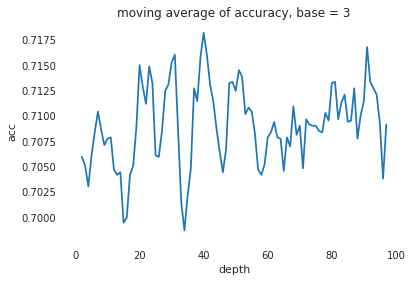

In [122]:
sns.lineplot(data = res, x = "depth", y = "acc").set_title("moving average of accuracy, base = 3")

Widzimy, że najlepiej wypada model dla głębokości około 40, ale ogólnie charakteryzuje się sporą wariancją wyniku accuracy

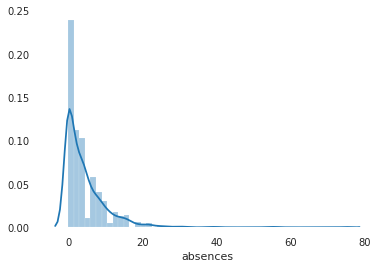

In [123]:
sns.distplot(df.absences)

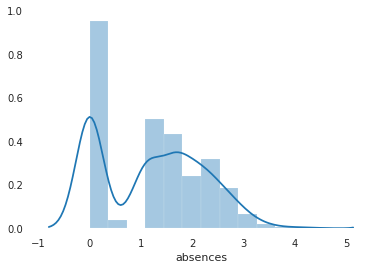

In [124]:
sns.distplot(np.log(df.absences+1)) # pytanie czy warto, może coś lepszego

In [220]:
df["absences"] = np.log(df.absences +1)

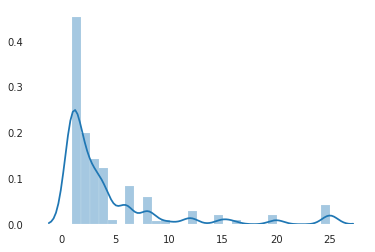

In [158]:
sns.distplot(df.loc[df.romantic_yes == 1].Walc * df.loc[df.romantic_yes == 1].Dalc)

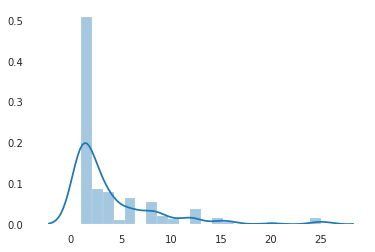

In [159]:
sns.distplot(df.loc[df.romantic_yes == 0].Walc * df.loc[df.romantic_yes == 0].Dalc)

In [221]:
df["WeekandEnd"] = df.Walc * df.Dalc

In [222]:
acc_arr = np.zeros(20)
for i in range(20):
    acc2, _ = train_fast(df,40)
    acc_arr[i] = acc2

[0]	eval-auc:0.69847	train-auc:0.943899
[50]	eval-auc:0.769577	train-auc:1
[99]	eval-auc:0.762196	train-auc:1
[0]	eval-auc:0.655798	train-auc:0.934646
[50]	eval-auc:0.821396	train-auc:1
[99]	eval-auc:0.8366	train-auc:1
[0]	eval-auc:0.678363	train-auc:0.949497
[50]	eval-auc:0.795676	train-auc:1
[99]	eval-auc:0.793727	train-auc:1
[0]	eval-auc:0.535996	train-auc:0.915929
[50]	eval-auc:0.762777	train-auc:1
[99]	eval-auc:0.775966	train-auc:1
[0]	eval-auc:0.671387	train-auc:0.930621
[50]	eval-auc:0.845497	train-auc:1
[99]	eval-auc:0.837691	train-auc:1
[0]	eval-auc:0.744374	train-auc:0.945999
[50]	eval-auc:0.863193	train-auc:1
[99]	eval-auc:0.846004	train-auc:1
[0]	eval-auc:0.662301	train-auc:0.934734
[50]	eval-auc:0.823228	train-auc:1
[99]	eval-auc:0.831288	train-auc:1
[0]	eval-auc:0.622592	train-auc:0.921328
[50]	eval-auc:0.805581	train-auc:1
[99]	eval-auc:0.80216	train-auc:1
[0]	eval-auc:0.611786	train-auc:0.94098
[50]	eval-auc:0.810571	train-auc:1
[99]	eval-auc:0.808063	train-auc:1
[0]	ev

In [223]:
acc_arr.mean()       # ciut lepiej

0.7535031847133759

In [224]:
a = np.where((df.Dalc > 3)&(df.Walc <3),1,0 )   # wniosek z eda, osoby oznaczone w tej kolumnie jako 1, to wyłącznie romantycy
df["WeirdDrinker"] = a

In [225]:
acc_arr = np.zeros(20)
for i in range(20):
    acc3, _ = train_fast(df,40)
    acc_arr[i] = acc3

[0]	eval-auc:0.647882	train-auc:0.93077
[50]	eval-auc:0.742867	train-auc:1
[99]	eval-auc:0.761652	train-auc:1
[0]	eval-auc:0.651935	train-auc:0.952581
[50]	eval-auc:0.776598	train-auc:1
[99]	eval-auc:0.774437	train-auc:1
[0]	eval-auc:0.687144	train-auc:0.931398
[50]	eval-auc:0.837619	train-auc:1
[99]	eval-auc:0.839517	train-auc:1
[0]	eval-auc:0.701292	train-auc:0.947721
[50]	eval-auc:0.851659	train-auc:1
[99]	eval-auc:0.850116	train-auc:1
[0]	eval-auc:0.573943	train-auc:0.90367
[50]	eval-auc:0.747541	train-auc:1
[99]	eval-auc:0.748922	train-auc:1
[0]	eval-auc:0.608726	train-auc:0.935896
[50]	eval-auc:0.776566	train-auc:1
[99]	eval-auc:0.780084	train-auc:1
[0]	eval-auc:0.661058	train-auc:0.915763
[50]	eval-auc:0.768491	train-auc:1
[99]	eval-auc:0.780695	train-auc:1
[0]	eval-auc:0.605421	train-auc:0.927021
[50]	eval-auc:0.840085	train-auc:1
[99]	eval-auc:0.837963	train-auc:1
[0]	eval-auc:0.600734	train-auc:0.94493
[50]	eval-auc:0.816355	train-auc:1
[99]	eval-auc:0.802726	train-auc:1
[0]	

In [226]:
acc_arr.mean()      # już dużo lepiej niż oryginalnie

0.771656050955414

In [203]:
from sklearn.decomposition import PCA

In [185]:
pca = PCA(n_components=10) 
principalComponents = pca.fit_transform(df.drop("romantic_yes", axis = 1))

cols = []
for i in range(10): 
    cols.append("pc"+str(i+1))

principalDf = pd.DataFrame(data = principalComponents, columns = cols)
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.353774,-0.550099,-0.110924,1.886126,2.526790,1.923906,-1.242351,-0.024718,0.037111,0.616042
1,10.094487,-1.389813,-2.389793,-0.335878,1.051091,-0.025940,-1.065988,-0.697437,0.053942,0.416029
2,4.957534,0.323846,-2.723654,-0.444309,1.689641,-1.447474,1.149817,-0.858096,-0.621435,-0.693584
3,-6.021629,-1.902445,1.577135,-1.106217,0.872031,-0.140397,1.308566,-0.877959,-0.555090,0.681144
4,4.019292,-0.189450,-0.932625,-1.010804,3.890214,0.445719,0.270783,1.191066,-0.959605,0.038107
...,...,...,...,...,...,...,...,...,...,...
1039,1.678819,-0.104869,-0.122668,-1.480298,-0.138726,2.519995,-0.997655,0.763093,-0.258722,-0.676246
1040,-7.072694,-0.597366,-1.782231,1.796408,-1.610812,0.667217,-1.030189,-0.487840,-0.032344,0.276993
1041,1.331891,-2.302947,-1.179159,-2.085767,-1.457850,1.768753,3.105314,0.654245,-2.098445,0.207371
1042,2.377861,2.692444,-0.893670,1.841289,-1.186198,-1.044776,0.687772,-0.241463,-0.489388,-0.457325


In [187]:
pca.explained_variance_ratio_.cumsum()   # 65 % wariancji w 2 ważnych kolumnach

array([0.59902194, 0.65019026, 0.69491414, 0.73266921, 0.77016296,
       0.79725053, 0.82188999, 0.84136708, 0.8570918 , 0.87190621])

zredukowaliśmy wymiar do 10

In [188]:
pca_df = pd.concat([principalDf,df.romantic_yes],axis =1)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,romantic_yes
0,9.353774,-0.550099,-0.110924,1.886126,2.526790,1.923906,-1.242351,-0.024718,0.037111,0.616042,0
1,10.094487,-1.389813,-2.389793,-0.335878,1.051091,-0.025940,-1.065988,-0.697437,0.053942,0.416029,0
2,4.957534,0.323846,-2.723654,-0.444309,1.689641,-1.447474,1.149817,-0.858096,-0.621435,-0.693584,0
3,-6.021629,-1.902445,1.577135,-1.106217,0.872031,-0.140397,1.308566,-0.877959,-0.555090,0.681144,1
4,4.019292,-0.189450,-0.932625,-1.010804,3.890214,0.445719,0.270783,1.191066,-0.959605,0.038107,0
...,...,...,...,...,...,...,...,...,...,...,...
1039,1.678819,-0.104869,-0.122668,-1.480298,-0.138726,2.519995,-0.997655,0.763093,-0.258722,-0.676246,0
1040,-7.072694,-0.597366,-1.782231,1.796408,-1.610812,0.667217,-1.030189,-0.487840,-0.032344,0.276993,0
1041,1.331891,-2.302947,-1.179159,-2.085767,-1.457850,1.768753,3.105314,0.654245,-2.098445,0.207371,0
1042,2.377861,2.692444,-0.893670,1.841289,-1.186198,-1.044776,0.687772,-0.241463,-0.489388,-0.457325,0


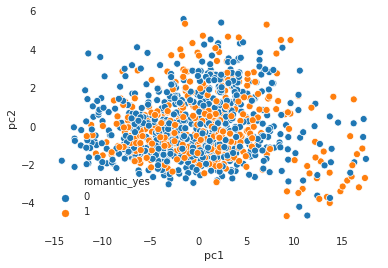

In [189]:
sns.scatterplot(x = "pc1", y = "pc2", data = pca_df, hue = "romantic_yes")  

Nie widać widocznego podziału danych

In [198]:
acc_arr = np.zeros(20)
for i in range(20):
    acc4, _ =  train_fast(pca_df,40)
    acc_arr[i] = acc3             

[0]	eval-auc:0.590414	train-auc:0.938522
[50]	eval-auc:0.66594	train-auc:1
[99]	eval-auc:0.651961	train-auc:1


/home/jakwisn/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/jakwisn/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	eval-auc:0.564772	train-auc:0.947271
[50]	eval-auc:0.615975	train-auc:1
[99]	eval-auc:0.617512	train-auc:1
[0]	eval-auc:0.54392	train-auc:0.937361
[50]	eval-auc:0.641421	train-auc:1
[99]	eval-auc:0.656451	train-auc:1
[0]	eval-auc:0.534023	train-auc:0.942584
[50]	eval-auc:0.655626	train-auc:1
[99]	eval-auc:0.656166	train-auc:1
[0]	eval-auc:0.57507	train-auc:0.936163
[50]	eval-auc:0.627638	train-auc:1
[99]	eval-auc:0.619421	train-auc:1
[0]	eval-auc:0.551198	train-auc:0.929449
[50]	eval-auc:0.686093	train-auc:1
[99]	eval-auc:0.687545	train-auc:1
[0]	eval-auc:0.649788	train-auc:0.950377
[50]	eval-auc:0.678819	train-auc:1
[99]	eval-auc:0.689236	train-auc:1
[0]	eval-auc:0.588125	train-auc:0.915627
[50]	eval-auc:0.601607	train-auc:1
[99]	eval-auc:0.590893	train-auc:1
[0]	eval-auc:0.59386	train-auc:0.931298
[50]	eval-auc:0.698276	train-auc:1
[99]	eval-auc:0.695989	train-auc:1
[0]	eval-auc:0.503754	train-auc:0.953026
[50]	eval-auc:0.611404	train-auc:1
[99]	eval-auc:0.627435	train-auc:1
[0]	

In [200]:
acc_arr.mean()                                  # jest okej, ale lepiej gdy działamy na zwykłych danych

0.7388535031847134

In [227]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,major_por,WeekandEnd,WeirdDrinker
0,18,4,4,2,2,0,4,3,4,1,1,3,1.945910,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,1.609438,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,2.397895,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,6,0
3,15,4,2,1,3,0,3,2,2,1,1,5,1.098612,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,1.609438,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,2,0


Czyli najlepsze, bo ok 77% dostaliśmy accuracy modelu z kilkoma dodatkowymi kolumnami. Co jeszcze warto przemyśleć? Standaryzację zmiennych, jaki ma efekt dla modelu (dla tego powinien mieć żaden), na koniec projektu przemyślimy kilka modeli - drzewiaste, sieć nauronową oraz być może k średich. 